# Course-End Project: Sales Analysis

In [99]:
import pandas as pd
import numpy as np

## 1. Data Wrangling

> Reading the input csv</font>

In [100]:
salesdf=pd.read_csv("AusApparalSales4thQrt2020.csv")

In [101]:
salesdf.info() # Checking for info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


In [102]:
salesdf.describe(include="all") # checking descriptive statistics

,Date,Time,State,Group,Unit,Sales
count,7560,7560,7560,7560,7560.000000,7560.000000
unique,90,4,7,4,NaN,NaN
top,1-Oct-20,Afternoon,WA,Kids,NaN,NaN
freq,84,2520,1080,1890,NaN,NaN
mean,NaN,NaN,NaN,NaN,18.005423,45013.558201
std,NaN,NaN,NaN,NaN,12.901403,32253.506944
min,NaN,NaN,NaN,NaN,2.000000,5000.000000
25%,NaN,NaN,NaN,NaN,8.000000,20000.000000
50%,NaN,NaN,NaN,NaN,14.000000,35000.000000
75%,NaN,NaN,NaN,NaN,26.000000,65000.000000


<font color ='red'>
●	Ensure that the data is clean and that there is no missing or incorrect data. 
○	Inspect the data manually for missing/incorrect data using the functions isna(), and notna().
</font>

In [103]:
salesdf.isna() # Checking for non null values

,Date,Time,State,Group,Unit,Sales
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
7555,False,False,False,False,False,False
7556,False,False,False,False,False,False
7557,False,False,False,False,False,False
7558,False,False,False,False,False,False


In [104]:
salesdf.isna().sum() # checking for count of null values.

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

<font color ='red'>
●	Based on your knowledge of Data Analytics, include your recommendations for treating missing data and incorrect data. (dropping the null values or filling them).
</font>

> The above analysis confirms that there are no null values in the data but if we had null vales in any column, then we can use the fillna() function to fill na vales with either mean,mode or median

<font color ="red">
●	Select an appropriate Data Wrangling approach —  data standardization or data normalization. Perform the standardization or normalization and present the data. (Normalization is the preferred approach for this problem.)
</font>

In [105]:
salesdf.dtypes

Date     object
Time     object
State    object
Group    object
Unit      int64
Sales     int64
dtype: object

In [106]:
salesdf['Group']=salesdf['Group'].str.strip() # Stripping the additional spaces in the Group column
salesdf['State']=salesdf['State'].str.strip() # Stripping the additional spaces in the State column
salesdf['Time']=salesdf['Time'].str.strip() # Stripping the additional spaces in the Time column

In [107]:
#checking for duplicates
salesdf.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7555    False
7556    False
7557    False
7558    False
7559    False
Length: 7560, dtype: bool

>  Data Wrangling approach .

In [108]:
salesdf.dtypes # checking data types . Next step will be cleaning by normalization

Date     object
Time     object
State    object
Group    object
Unit      int64
Sales     int64
dtype: object

> We need to convert the date objects to appropriate data type- date time in this instance

In [109]:
salesdf['Date']=pd.to_datetime(salesdf['Date'])

/var/folders/_g/6xqs1lrj7kv9235d1ycjgk8w0000gn/T/ipykernel_1961/922895.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  salesdf['Date']=pd.to_datetime(salesdf['Date'])


In [110]:
salesdf

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
7555,2020-12-30,Afternoon,TAS,Seniors,14,35000
7556,2020-12-30,Evening,TAS,Kids,15,37500
7557,2020-12-30,Evening,TAS,Men,15,37500
7558,2020-12-30,Evening,TAS,Women,11,27500


In [111]:
salesdf.dtypes

Date     datetime64[ns]
Time             object
State            object
Group            object
Unit              int64
Sales             int64
dtype: object

In [112]:
#Data Standardization using Mix Max normalization
salesdf["normalized_Sales"]=(salesdf["Sales"]-salesdf['Sales'].min())/(salesdf["Sales"].max()-salesdf['Sales'].min())
salesdf

,Date,Time,State,Group,Unit,Sales,normalized_Sales
0,2020-10-01,Morning,WA,Kids,8,20000,0.095238
1,2020-10-01,Morning,WA,Men,8,20000,0.095238
2,2020-10-01,Morning,WA,Women,4,10000,0.031746
3,2020-10-01,Morning,WA,Seniors,15,37500,0.206349
4,2020-10-01,Afternoon,WA,Kids,3,7500,0.015873
...,...,...,...,...,...,...,...
7555,2020-12-30,Afternoon,TAS,Seniors,14,35000,0.190476
7556,2020-12-30,Evening,TAS,Kids,15,37500,0.206349
7557,2020-12-30,Evening,TAS,Men,15,37500,0.206349
7558,2020-12-30,Evening,TAS,Women,11,27500,0.142857


<font color ="red">
●	Share your recommendation on the usage of the groupby() function for data chunking or merging.
</font>

We need to assess the data for each state and find out the sales average , sum and maximum values hence we will apply the group by function on the data frame and group the data by each state . we can use the agg() to apply mukltiple aggregations on the desired column 

## 2. Data Analysis

<font color="red">
●	Perform descriptive statistical analysis on the data (Sales and Unit columns) (Techniques such as mean, median, mode and standard deviation can be used.).

In [113]:
salesdf_sagg=salesdf.groupby(['State'])['Sales'].agg(['mean','count','min','max','var','median','sum'])
salesdf_sagg.reset_index(inplace=True, drop=False)
salesdf_sagg

,State,mean,count,min,max,var,median,sum
0,NSW,69416.666667,1080,30000,112500,4.254588e+08,70000.0,74970000
1,NT,20907.407407,1080,5000,37500,8.031579e+07,20000.0,22580000
2,QLD,30942.129630,1080,7500,62500,1.780794e+08,30000.0,33417500
3,SA,54497.685185,1080,25000,87500,3.048853e+08,52500.0,58857500
4,TAS,21074.074074,1080,5000,37500,8.144492e+07,20000.0,22760000
5,VIC,97745.370370,1080,50000,162500,7.087094e+08,95000.0,105565000
6,WA,20511.574074,1080,5000,37500,8.522809e+07,20000.0,22152500


In [114]:
salesdf_uagg=salesdf.groupby(['State'])['Unit'].agg(['mean','count','min','max','var','median'])
salesdf_uagg.reset_index(inplace=True, drop=False)
salesdf_uagg.sort_values(by ='mean', ascending =False, inplace=True)
salesdf_uagg

,State,mean,count,min,max,var,median
5,VIC,39.098148,1080,20,65,113.393509,38.0
0,NSW,27.766667,1080,12,45,68.073401,28.0
3,SA,21.799074,1080,10,35,48.781649,21.0
2,QLD,12.376852,1080,3,25,28.492698,12.0
4,TAS,8.429630,1080,2,15,13.031188,8.0
1,NT,8.362963,1080,2,15,12.850527,8.0
6,WA,8.204630,1080,2,15,13.636494,8.0


<font color ="red">●	Determine which state is generating the highest sales, and which state is generating the lowest sales.

In [115]:
import seaborn  as sns
import matplotlib.pyplot as plt

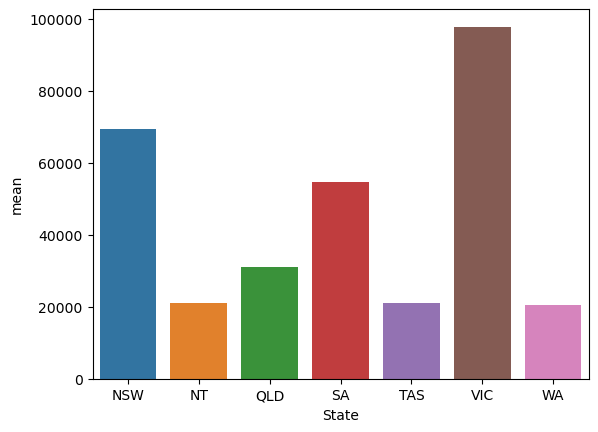

In [116]:
sns.barplot(data=salesdf_sagg,x="State",y="mean")
plt.show()

> From the above graph its clear that 
VIC has the highest sales
WA has the lowest sales 


<font color="red">
●	Determine which group is generating the highest sales, and which group is generating the lowest sales.

In [117]:
salesdf_gagg=salesdf.groupby(['Group'])['Sales'].agg(['mean','count','min','max','var','median','sum'])
salesdf_gagg.reset_index(inplace=True, drop=False)
salesdf_gagg.sort_values('mean' ,ascending = False)

,Group,mean,count,min,max,var,median,sum
1,Men,45370.370370,1890,5000,160000,1.035371e+09,35000.0,85750000
3,Women,45207.671958,1890,5000,162500,1.074636e+09,35000.0,85442500
0,Kids,45011.904762,1890,5000,162500,1.015792e+09,35000.0,85072500
2,Seniors,44464.285714,1890,5000,162500,1.036541e+09,35000.0,84037500


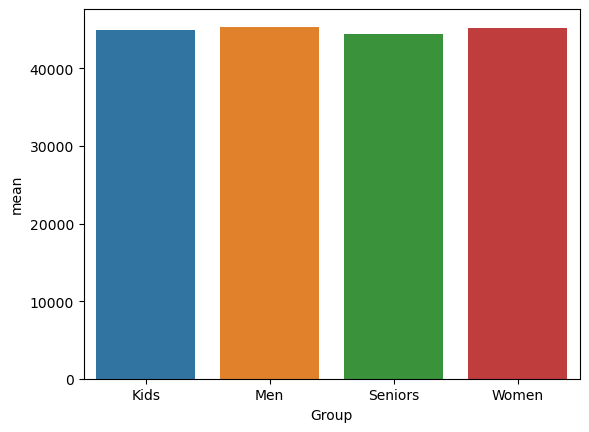

In [118]:
sns.barplot(data=salesdf_gagg,x="Group",y="mean")
plt.show()

> Highest Sales made by Men Group & 
Lowest Sales made by Seniors group 

<font color="red">
●	Generate weekly, monthly and quarterly reports for the analysis made.

In [119]:
weekly_data=salesdf.groupby("State").resample('W', closed = 'right', on='Date').mean(['Sales','normalized_Sales'])
weekly_data.reset_index(inplace=True,drop=False)
weekly_data

,State,Date,Unit,Sales,normalized_Sales
0,NSW,2020-10-04,28.187500,70468.750000,0.415675
1,NSW,2020-10-11,28.059524,70148.809524,0.413643
2,NSW,2020-10-18,27.226190,68065.476190,0.400416
3,NSW,2020-10-25,28.202381,70505.952381,0.415911
4,NSW,2020-11-01,26.791667,66979.166667,0.393519
...,...,...,...,...,...
93,WA,2020-12-06,9.809524,24523.809524,0.123961
94,WA,2020-12-13,10.214286,25535.714286,0.130385
95,WA,2020-12-20,9.547619,23869.047619,0.119803
96,WA,2020-12-27,9.964286,24910.714286,0.126417


In [120]:
monthly_data=salesdf.groupby("State").resample('M', closed = 'right', on='Date').mean(['Sales','normalized_Sales'])
monthly_data.reset_index(inplace=True,drop=False)
monthly_data

,State,Date,Unit,Sales,normalized_Sales
0,NSW,2020-10-31,27.786111,69465.277778,0.409303
1,NSW,2020-11-30,23.877778,59694.444444,0.347266
2,NSW,2020-12-31,31.636111,79090.277778,0.470414
3,NT,2020-10-31,9.136111,22840.277778,0.113272
4,NT,2020-11-30,5.841667,14604.166667,0.060979
5,NT,2020-12-31,10.111111,25277.777778,0.128748
6,QLD,2020-10-31,12.355556,30888.888889,0.164374
7,QLD,2020-11-30,9.011111,22527.777778,0.111287
8,QLD,2020-12-31,15.763889,39409.722222,0.218474
9,SA,2020-10-31,22.900000,57250.000000,0.331746


In [121]:
quarterly_data=salesdf.groupby("State").resample('Q', closed = 'right', on='Date').mean(['Sales','normalized_Sales'])
quarterly_data.reset_index(inplace=True,drop=False)
quarterly_data

,State,Date,Unit,Sales,normalized_Sales
0,NSW,2020-12-31,27.766667,69416.666667,0.408995
1,NT,2020-12-31,8.362963,20907.407407,0.100999
2,QLD,2020-12-31,12.376852,30942.129630,0.164712
3,SA,2020-12-31,21.799074,54497.685185,0.314271
4,TAS,2020-12-31,8.429630,21074.074074,0.102058
5,VIC,2020-12-31,39.098148,97745.370370,0.588859
6,WA,2020-12-31,8.204630,20511.574074,0.098486


## 3. Data Visualization

●	Use appropriate data visualization libraries to build a dashboard for the Head of S&M that includes for the key parameters like 
- State-wise sales analysis for different groups (kids, women, men, and seniors) 
- Group-wise sales analysis (kids, women, men, and seniors) across different states.
- Time-of-the-day analysis: during which time of the day are sales the highest, and during which time are sales the lowest? [This helps S&M teams design programs for increasing sales such as hyper-personalization and Next Best Offers].
The dashboard must contain daily, weekly, monthly and quarterly charts.
 (Any visualization library can be used for this purpose. However, since statistical analysis is being done, Seaborn is preferred.)


In [122]:
salesdf_tagg=salesdf.groupby(['Time'])['Sales'].agg(['mean','count','min','max','median','sum'])
salesdf_tagg.reset_index(inplace=True, drop=False)
salesdf_tagg.sort_values('mean' ,ascending = False)

,Time,mean,count,min,max,median,sum
2,Morning,45320.436508,2520,5000,162500,35000.0,114207500
0,Afternoon,45241.071429,2520,5000,162500,35000.0,114007500
1,Evening,44479.166667,2520,5000,162500,35000.0,112087500


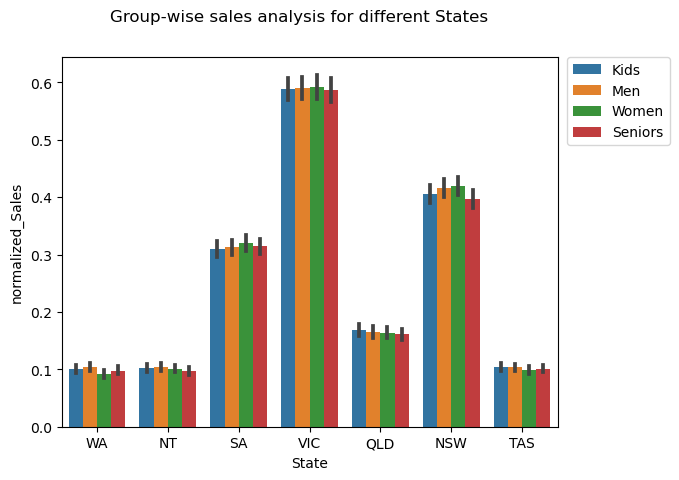

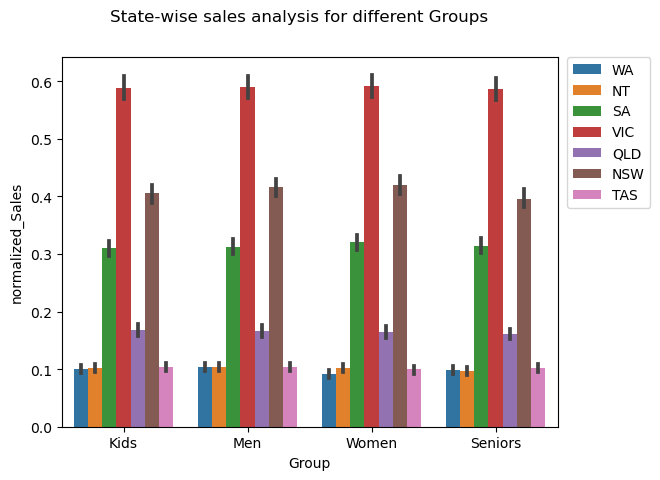

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


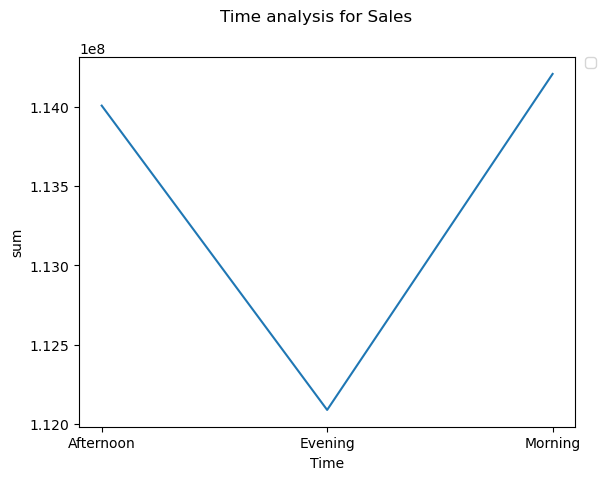

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(data=salesdf,x='State',y='normalized_Sales',hue="Group")
plt.suptitle("Group-wise sales analysis for different States ")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

sns.barplot(data=salesdf,x='Group',y='normalized_Sales',hue="State")
plt.suptitle("State-wise sales analysis for different Groups ")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

sns.lineplot(data=salesdf_tagg,x='Time',y='sum')
plt.suptitle("Time analysis for Sales ")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()



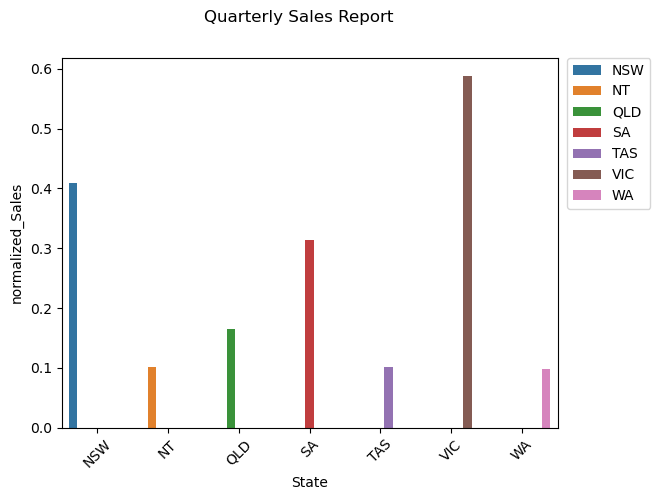

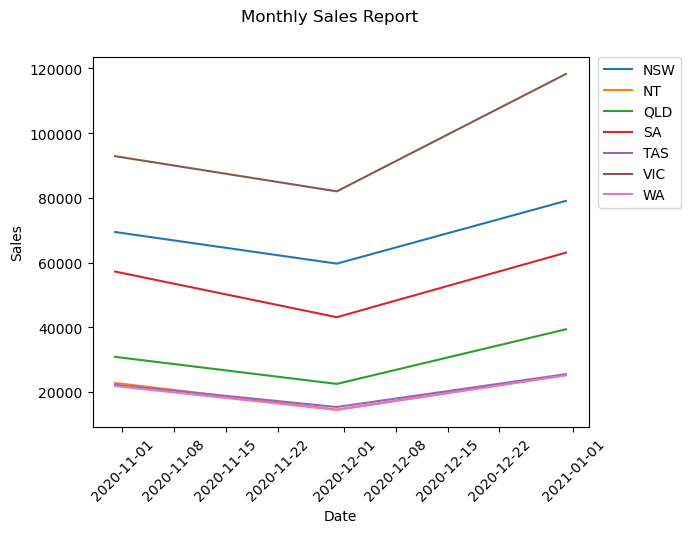

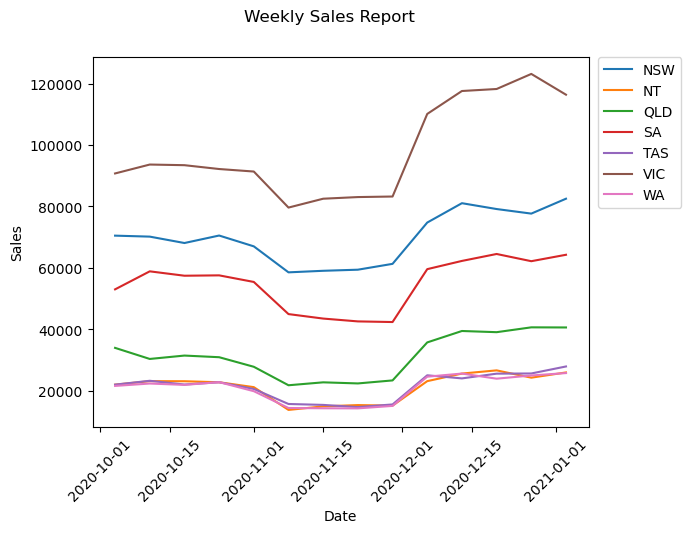

In [124]:

h=sns.barplot(data=quarterly_data,x='State',y='normalized_Sales',hue="State")
plt.xticks(rotation=45)
plt.suptitle("Quarterly Sales Report ")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()


g=sns.lineplot(data=monthly_data,x='Date',y='Sales',hue="State")
plt.xticks(rotation=45)
plt.suptitle("Monthly Sales Report ")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

h=sns.lineplot(data=weekly_data,x='Date',y='Sales',hue="State")
plt.xticks(rotation=45)
plt.suptitle("Weekly Sales Report ")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()